<a href="https://colab.research.google.com/github/Haridharshan15/Python-practice/blob/main/Simple_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q no:2 impleCalculator

In [ ]:

class SimpleCalculator:
    def add(self, a: float, b: float) -> float:
        """Returns the sum of two numbers."""
        return a + b

    def subtract(self, a: float, b: float) -> float:
        """Returns the difference between two numbers."""
        return a - b

    def multiply(self, a: float, b: float) -> float:
        """Returns the product of two numbers."""
        return a * b

    def divide(self, a: float, b: float) -> float | str:
        """
        Returns the quotient of two numbers.
        Handles DivisionByZeroError by returning an error message.
        """
        if b == 0:
            return "Error: Cannot divide by zero."
        return a / b

    def _get_numeric_input(self, prompt: str) -> float | None:
        """
        Internal method to safely read and validate a number from the user.
        Returns the float value or None if input is invalid.
        """
        try:
            return float(input(prompt))
        except ValueError:
            print("Invalid input. Please enter a valid number.")
            return None

    def calculate(self):
        print("-" * 35)
        print("Available Operations: +, -, *, /")
        print("Enter 'quit' to exit.")
        print("-" * 35)

        while True:
            # 1. Get the operation
            operation = input("Enter operation (+, -, *, /) or 'quit': ").strip().lower()

            if operation == 'quit':
                print("Calculator module shutting down. Goodbye!")
                break

            if operation not in ['+', '-', '*', '/']:
                print("Invalid operation. Please use +, -, *, or /.")
                continue

            # 2. Get the numbers with validation
            num1 = self._get_numeric_input("Enter first number: ")
            if num1 is None:
                continue # Restart loop if invalid input

            num2 = self._get_numeric_input("Enter second number: ")
            if num2 is None:
                continue # Restart loop if invalid input

            # 3. Perform the calculation and display result
            result = None
            if operation == '+':
                result = self.add(num1, num2)
            elif operation == '-':
                result = self.subtract(num1, num2)
            elif operation == '*':
                result = self.multiply(num1, num2)
            elif operation == '/':
                result = self.divide(num1, num2)

            # Check if the result is an error message (from divide by zero)
            if isinstance(result, str) and result.startswith("Error"):
                print(result)
            elif result is not None:
                # Format output to a maximum of 4 decimal places for cleanliness
                print(f"\nResult: {num1} {operation} {num2} = {result:.4f}\n")

# --- Execution Start Point ---
if __name__ == "__main__":
    app = SimpleCalculator()
    app.calculate()

-----------------------------------
Available Operations: +, -, *, /
Enter 'quit' to exit.
-----------------------------------
Enter operation (+, -, *, /) or 'quit': /
Enter first number: 2
Enter second number: 3

Result: 2.0 / 3.0 = 0.6667

Enter operation (+, -, *, /) or 'quit': quit
Calculator module shutting down. Goodbye!


 Q3.b) Implement a Decision Tree classifier using Python.

   ID  Credit_Score  Income (₹k/month)  Debt_Ratio (%) Loan_Status
0   1           780                 85              20    Approved
1   2           690                 60              35    Approved
2   3           720                 45              55    Rejected
3   4           650                 50              40    Rejected
4   5           800                 95              15    Approved
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         5

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



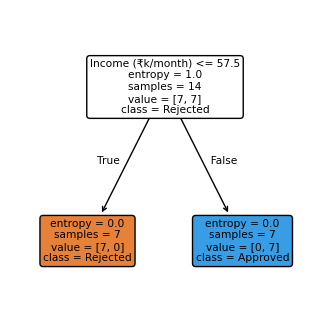

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("loan_approval_dataset.csv")

# Display first few rows
print(df.head())


# Encode target variable
df["Loan_Status"] = df["Loan_Status"].map({"Approved": 1, "Rejected": 0})
# Define features and target
X = df[["Credit_Score", "Income (₹k/month)", "Debt_Ratio (%)"]]
y = df["Loan_Status"]
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
# Train the model
model.fit(X_train, y_train)


# Predictions
y_pred = model.predict(X_test)
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the Decision Tree
plt.figure(figsize=(4, 4))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["Rejected", "Approved"], rounded=True)
plt.show()

Q4. Comprehensive ML Pipeline Design a complete machine learning solution for predicting
house prices

In [ ]:
'''Q4. Comprehensive ML Pipeline Design a complete machine learning solution for predicting
house prices: [10 Marks]
a) Write Python code for data preprocessing (handling missing values, feature scaling).
b) Implement Linear Regression model training.
c) Create a validation strategy using train-test split.
d) Evaluate model performance using any methods.'''

# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 2: Load the dataset
data = pd.read_csv("/content/House Price Prediction Dataset.csv")

# Show first few rows
print("🔹 First 5 rows of data:")
print(data.head())

# Step 3: Check for missing values
print("\n🔹 Missing values in each column:")
print(data.isnull().sum())

# Step 4: Handle missing values
# If numeric column → fill with mean
# If categorical column → fill with mode (most frequent value)
for column in data.columns:
    if data[column].dtype == "object":      # categorical
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:                                   # numeric
        data[column].fillna(data[column].mean(), inplace=True)
print("\nMissing values handled")

# Step 5: Convert categorical variables into numbers (One-Hot Encoding)
data = pd.get_dummies(data, drop_first=True)

# Step 6: Separate features (X) and target (y)
X = data.drop("Price", axis=1)   # Assuming 'Price' is the target column
y = data["Price"]

# Step 7: Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Feature scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\Feature scaling completed")

# Step 9: Display results
print("\nTraining data shape:", X_train_scaled.shape)
print("Testing data shape:", X_test_scaled.shape)


🔹 First 5 rows of data:
   Id    Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360.0         5          4       3       1970  Downtown  Excellent   
1   2  4272.0         5          4       3       1958  Downtown  Excellent   
2   3  3592.0         2          2       3       1938  Downtown       Good   
3   4   966.0         4          2       2       1902  Suburban       Fair   
4   5  4926.0         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  

🔹 Missing values in each column:
Id           0
Area         3
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

Missing values handled
\Feature scaling completed

Training data shape: (1600, 14)
Testing data shape: (400, 14)


<>:49: SyntaxWarning: invalid escape sequence '\F'
<>:49: SyntaxWarning: invalid escape sequence '\F'
/tmp/ipython-input-519099128.py:49: SyntaxWarning: invalid escape sequence '\F'
  print("\Feature scaling completed")
/tmp/ipython-input-519099128.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)
/tmp/ipython-input-519099128.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behav

b) Step 1: Import the Linear Regression model

In [ ]:

from sklearn.linear_model import LinearRegression

# Step 2: Create the model
model = LinearRegression()

# Step 3: Train (fit) the model on training data
model.fit(X_train_scaled, y_train)

# Step 4: Display model coefficients and intercept
print("Model training completed\n")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Model training completed

Intercept: 536183.7
Coefficients: [ -7215.55758951   -965.31957279    276.45755245 -11021.47312757
  19081.74426123   4529.93590911 160007.57144068 153712.50882921
 155558.36402031 148455.97965236  10159.50040485  -5897.18386374
   1499.21963566   1354.97558414]


c) Create a validation strategy using train-test split.

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location_Downtown,Location_Rural,Location_Suburban,Location_Urban,Condition_Fair,Condition_Good,Condition_Poor,Garage_Yes
968,969,4483.0,4,4,3,1933,False,False,False,True,False,False,False,False
240,241,1062.0,3,3,1,1970,True,False,False,False,False,True,False,False
819,820,1422.0,3,4,1,1993,False,False,False,True,False,True,False,True
692,693,2658.0,2,3,1,1972,False,True,False,False,False,False,True,True
420,421,3286.0,2,4,1,1981,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1131,3483.0,5,3,3,1931,True,False,False,False,False,True,False,True
1294,1295,1747.0,3,3,2,1941,True,False,False,False,True,False,False,True
860,861,1484.0,2,3,3,1973,True,False,False,False,False,True,False,False
1459,1460,3456.0,5,4,1,1955,True,False,False,False,False,True,False,True


d) Evaluate model performance using any methods.

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Make predictions on test data
y_pred = model.predict(X_test_scaled)

# Step 2: Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 3: Display the results
print("Model Evaluation Results:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Model Evaluation Results:
Mean Absolute Error: 242574.7374478785
Mean Squared Error: 78186343820.02104
R² Score: -0.004980991455707295
